# **Analísis cualitativo de modelos de Microscopios de Fuerza Atomica - Codigos Python**
**Grupo de Investigación en Ecuaciones Diferenciales Y Aplicaciones (GREDYA)**

**Alexander Gutierrez**

**Daniel Cortes Zapata**

**Johan Sebastian Duque**

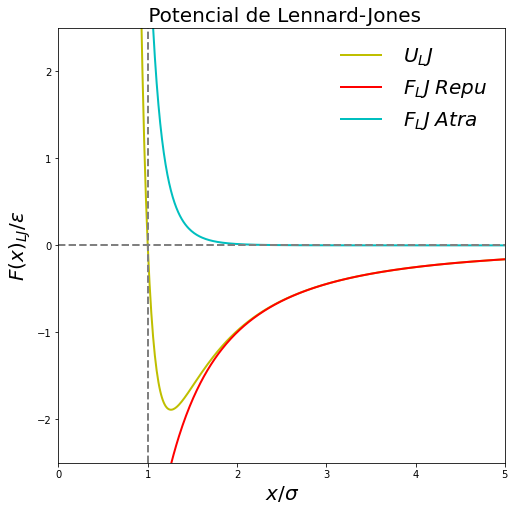

In [ ]:
#Programa 1 Gráfica de Potencial de Lennard-Jones

#Librerias
import matplotlib.pyplot as plt  
import numpy as np


x = np.linspace(0.01,5.0,num=500)  # Vector de dominio del potencial

#parametros del potencial
epsilon = 1 
sigma = 1 

U_LJ = 4*epsilon*((sigma/x)**8-(sigma/x)**2) # Función de potencial Lennard Jones
U_LJ1 = 4*epsilon*(-(sigma/x)**2)  # Componente atractiva del potencial 
U_LJ2 = 4*epsilon*((sigma/x)**8) # Componente repulsiva del potencial

#Gragficas usando la libreria matplotlib
plt.figure(figsize=[8,8])   # crer la figura y asiganar el tamaño
plt.plot(x,U_LJ, 'y-',linewidth=2,label=r" $U_LJ\;$")   #Grafica la funcion de LJ
plt.plot(x,U_LJ1, 'r-',linewidth=2,label=r" $F_LJ\; Repu$") #Gráfica la componente repulsiva
plt.plot(x,U_LJ2, 'c-',linewidth=2,label=r" $F_LJ\; Atra$") #Gráfica la componente atractiva

plt.title(r" Potencial de Lennard-Jones",fontsize=20) #Titulo de la figura
plt.xlim([0.0,5.0])  #Limite de la gráfica en el eje x
plt.ylim([-2.5,2.5]) #Limite de la gráfica en el eje y

# Etiquetas de los ejes y leyenda del gráfico
plt.ylabel(r"$F(x)_{LJ}/\epsilon$",fontsize=20)
plt.xlabel(r"$x/\sigma$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(1, color='grey',linestyle='--',linewidth=2)
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


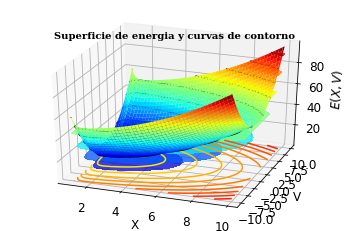

In [ ]:
#  Programa 2 Grafica de las  Superficies de Energia y las Curvas de Contorno

#Librerias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Definimos la función de energia para el modelo AFM E(x,y)
def fun(x, v):
    return ((v**2/2) + (x**2/2) + (77/(7*x**7)) - (0.03/x)-0.1*x )

#creamos la figura 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(1, 10, .1) # vector de pasos para la variable x
v = np.arange(-10, 10, .1) # # vector de pasos para la variable v
X, Y = np.meshgrid(x, v) # Asgina la malla 2-D (x,v) para las curvas de nivel
zs = np.array([fun(x,v) for x, v in zip(np.ravel(X), np.ravel(Y))]) #Variable Z para crear al superficie
Z = zs.reshape(X.shape) 

#Gragficas usando la libreria matplotlib y mplot3D
ax.plot_surface(X, Y, Z, cmap='jet') #Grafica la superficie de energia (x,v,E)
ax.set_xlabel(r'X', fontsize=12)
ax.set_ylabel(r'V', fontsize=12)
ax.set_zlabel(r'$E(X,V)$', fontsize=12)

#Etiquetas de los ejes y titulo del grafico
plt.tick_params(labelsize=12)
plt.title("Superficie de energia y curvas de contorno",  position=(0.5, 0.9),fontdict={'family': 'serif','color' : 'black','weight': 'bold','size': 10})
ax.view_init(30, -70)

#Visualización de las superficies de contorno sobre la grafica y mostrar el grafico
ax.contour(X, Y, Z, 10, cmap="autumn_r", linestyles="solid", offset=0)
ax.contour(X, Y, Z, 10, colors="k", linestyles="solid")
ax.contourf(X, Y, Z, 8, alpha=.75, cmap='jet')
plt.show() 


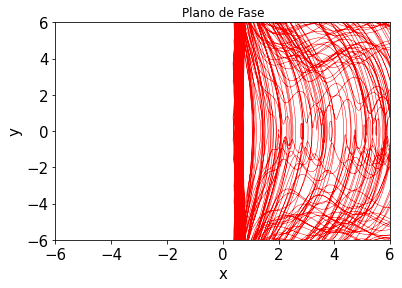

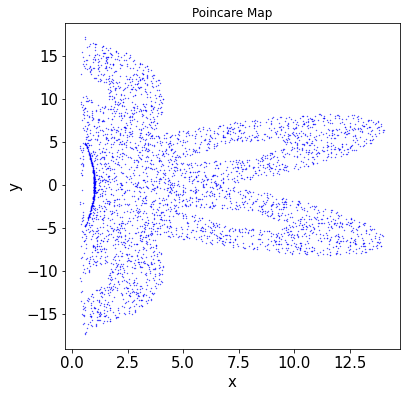

In [ ]:
# Program 3: Diagrama de fase y mapa de Poincare del sistema dinámico asociado al AFM.

#Librerias
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  

#Limites de x e y
xmin, xmax = -6, 6
ymin, ymax = -6, 6

#Parametros de la ecuación asociada al modelo de AFM (Ecuación 1.21)
b1=1;
b2=30;
C=0;
a=1
omega = 2*np.pi;
F = 10;

#Definimos el sistema dinamico asociado a la ecuación 1.21
def dx_dt(x, t):
    return [x[1], (b1/x[0]**8)-(b2/x[0]**2)-x[0]+a + F*np.cos(omega*t)-(C/(x[0]**3)*x[1])]

# Diagrama de Fase
t = np.linspace(0, 500, 10000) #Vector de tiempos
xs = odeint(dx_dt, [2,0], t) #uso del paquete odeint para la solución númerica de la ecuación diferencial
plt.plot(xs[:, 0], xs[:, 1], 'r-', lw=0.5) #Visualización del gráfico
plt.xlabel('x', fontsize=15)  #Etiquetas del eje x
plt.ylabel('y', fontsize=15)   #Etiquetas del eje y
plt.tick_params(labelsize=15) #Tamaño de las etiquetas
plt.xlim(xmin, xmax) #Limites del grafico en x
plt.ylim(ymin, ymax) #Limites del gráfico en y 
plt.title('Plano de Fase') #Titulo del gráfico

# Mapa de Poincare
fig, ax = plt.subplots(figsize=(6, 6)) #definimos las subfiguras para el plano de fase y el mapa de poincare
t = np.linspace(0, 4000 * (2*np.pi) / omega, 16000000) #vector de tiempos
xs = odeint(dx_dt, [1, 0], t) ##uso del paquete odeint para la solución númerica de la ecuación diferencial

#Vector de pasos para x y para y
x = [xs[4000*i, 0] for i in range(4000)]  
y = [xs[4000*i, 1] for i in range(4000)]

#Grafico de dispersión para la visualización del mapa de Poincare
ax.scatter(x, y, color='blue', s=0.1) 
plt.xlabel('x', fontsize=15)  #Etiquetas del eje x
plt.ylabel('y', fontsize=15)  #Etiquetas del eje y
plt.tick_params(labelsize=15) #Tamaño de las etiquetas
plt.title('Poincare Map')  #Titulo del gráfico
plt.show()